<a href="https://colab.research.google.com/github/dzkha/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 4)

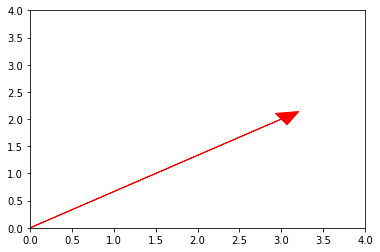

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

x = np.array([3,2])
plt.arrow(0,0,x[0],x[1],head_width=.25,head_length=0.25,color='red')
plt.xlim(0,4)          
plt.ylim(0,4)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
b = np.array([17,-4,-2,1])
print(np.linalg.norm(b))

#The norm represents the length

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)

#Not orthogonal because the dot product is nonzero

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

print(np.linalg.inv(E))
print(E.T)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [5]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [6]:
#Mean and std
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [7]:
#Variance
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
They are not directly comparable because they are scaled differently.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df = df.drop('Country', axis=1)

In [19]:
import sklearn
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

scaled = sklearn.preprocessing.scale(df,with_std=True)
print(scaled)

[[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [33]:
test = pd.DataFrame(scaled)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [21]:
test.describe()

#The std isn't 1 for some reason

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


In [34]:
test = test.apply(lambda x : x/1.154701)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.570082,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697563,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106060,1.038240,0.998042,1.330127,1.340570,0.377324,0.947023,1.213891,0.072803,1.014638,0.804795,1.454457,1.393815,-1.216104,0.729040,0.838418
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156877,-0.614734,-0.429864,1.310463,-0.760978,-0.049855,-0.740950,-0.404656,1.031199,0.620562,0.646780
3,-1.498123,1.318181,-1.284420,-1.268698,0.167663,-0.985238,1.169330,-1.079938,-1.111157,-1.092052,-0.951223,-1.393553,-0.155508,-0.944197,0.561826,-1.440532,-1.365424


In [0]:
scaled = scaled/1.154701

In [37]:
scaled

array([[ 0.57008235, -0.01515151, -0.22477353,  0.55822706, -0.54769953,
         0.11306015, -0.38977675,  0.74764968,  0.32712887, -0.29121399,
         0.69756346,  0.63861301, -0.55799922, -0.04496178, -0.37692105,
         0.09093061, -0.11977403],
       [ 0.46402051, -1.10606016,  1.03823964,  0.99804232,  1.33012742,
         1.3405704 ,  0.37732382,  0.94702293,  1.21389141,  0.0728035 ,
         1.01463776,  0.80479484,  1.45445699,  1.3938152 , -1.21610377,
         0.72904013,  0.83841822],
       [ 0.46402051, -0.19696962,  0.47095406, -0.28757152, -0.95009102,
        -0.46839207, -1.15687733, -0.61473418, -0.42986355,  1.31046294,
        -0.76097832, -0.04985455, -0.74094979, -0.40465603,  1.03119911,
         0.62056151,  0.64677977],
       [-1.49812337,  1.31818129, -1.28442017, -1.26869787,  0.16766312,
        -0.98523849,  1.16933026, -1.07993843, -1.11115673, -1.09205245,
        -0.9512229 , -1.3935533 , -0.15550798, -0.9441974 ,  0.56182572,
        -1.44053224

In [35]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000
mean,0.000000,0.000000,-5.551115e-17,0.000000,-6.938894e-18,2.775558e-17,-5.551115e-17,0.000000,5.551115e-17,-5.551115e-17,0.000000,-5.551115e-17,-1.387779e-17,-2.775558e-17,0.000000,0.000000,0.000000
std,1.000000,1.000000,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,9.999996e-01,1.000000,1.000000,1.000000
min,-1.498123,-1.106060,-1.284420e+00,-1.268698,-9.500910e-01,-9.852385e-01,-1.156877e+00,-1.079938,-1.111157e+00,-1.092052e+00,-0.951223,-1.393553e+00,-7.409498e-01,-9.441974e-01,-1.216104,-1.440532,-1.365424
25%,-0.026515,-0.424242,-4.896852e-01,-0.532853,-6.482974e-01,-5.976037e-01,-5.815519e-01,-0.731035,-6.001868e-01,-4.914236e-01,-0.808539,-3.857792e-01,-6.037369e-01,-5.395414e-01,-0.586717,-0.291935,-0.431187
50%,0.464021,-0.106061,1.230903e-01,0.135328,-1.900182e-01,-1.776660e-01,-6.226466e-03,0.066458,-5.136734e-02,-1.092052e-01,-0.031707,2.943792e-01,-3.567536e-01,-2.248089e-01,0.092452,0.355746,0.263503
75%,0.490536,0.318182,6.127755e-01,0.668181,4.582792e-01,4.199377e-01,5.753254e-01,0.797493,5.488195e-01,3.822184e-01,0.776832,6.801585e-01,2.469833e-01,3.147325e-01,0.679169,0.647681,0.694689
max,0.570082,1.318181,1.038240e+00,0.998042,1.330127e+00,1.340570e+00,1.169330e+00,0.947023,1.213891e+00,1.310463e+00,1.014638,8.047948e-01,1.454457e+00,1.393815e+00,1.031199,0.729040,0.838418


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [38]:
from numpy import array

pca = PCA()
pca.fit(scaled)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
B = pca.transform(scaled)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-2.45721306e-01  2.85629138e-01 -2.64810550e-01 -2.86117870e-01
  -1.27194871e-01 -2.81101200e-01  9.77590134e-02 -2.65449973e-01
  -2.87086285e-01 -1.20738194e-01 -2.57678148e-01 -2.78905206e-01
  -1.78439965e-01 -2.77475135e-01  2.27719614e-01 -2.55094839e-01
  -2.52758343e-01]
 [ 2.47080410e-01 -7.71699288e-02  1.36107042e-01 -1.10060250e-02
  -4.00545010e-01 -1.36840924e-01 -4.54687845e-01 -9.64862998e-02
  -9.28232164e-02  4.10361293e-01 -1.53960303e-01  8.17464426e-02
  -3.29029485e-01 -1.37738475e-01  2.93239813e-01  2.32318084e-01
   2.11057011e-01]
 [ 1.87238878e-01  1.53277132e-01 -3.04395448e-01  2.04993044e-01
  -3.40102336e-01 -5.07316147e-02 -1.13389428e-01  3.50645188e-01
   7.33350745e-02 -3.20378339e-01  3.33404938e-01  2.42840195e-01
  -3.86164480e-01 -1.48397766e-01 -1.71683285e-01 -1.17367277e-01
  -2.45297421e-01]
 [-3.50292707e-01  7.64210805e-01  1.50899247e-01  8.68288706e-02
  -5.99582633e-04  7.77290930e-03 -2.60347876e-01  1.21261065e-01
 

Text(0, 0.5, 'Principal Component 2')

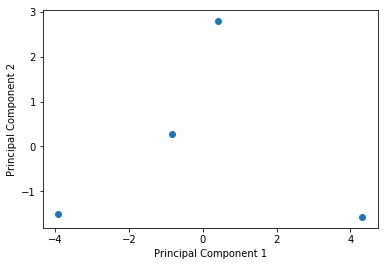

In [39]:
x = []
y = []

for i in B:
  x.append(i[0])
  
for i in B:
  y.append(i[1])

plt.scatter(x,y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [40]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


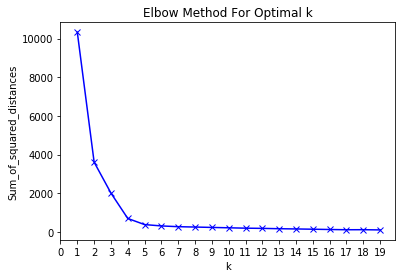

In [41]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xticks(np.arange(20))
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#k=4

In [42]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 0 0 3 0 0 3 3 2 0 0 0 0 0 3 0 3 0 0 1 3 1 1 1 0 0 0 2 0 0 0 0 0 1 0 0 0
 0 2 0 0 1 2 2 2 0 0 0 3 0 1 3 3 2 1 0 0 2 2 3 1 0 3 2 1 2 1 2 3 2 0 0 0 0
 1 1 0 0 2 1 2 0 0 0 2 0 2 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 3 0 0 1 3 3 3 1 0
 1 0 3 0 0 2 2 1 2 1 0 0 3 0 3 0 1 2 3 0 3 0 3 2 2 0 1 3 0 2 0 0 1 0 2 0 2
 3 0 0 0 3 1 0 2 0 1 0 3 0 0 2 3 1 1 0 2 0 0 3 0 2 1 0 0 0 0 0 3 0 0 0 0 0
 0 3 1 2 0 0 3 1 3 0 2 1 1 0 0]


In [44]:
points['labels'] = labels
points

,x,y,labels
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0
5,-4.977194,-6.138836,0
6,-8.118990,-3.624109,3
7,-8.145629,-2.787951,3
8,-3.568659,5.401781,2
9,-5.711709,-6.802013,0


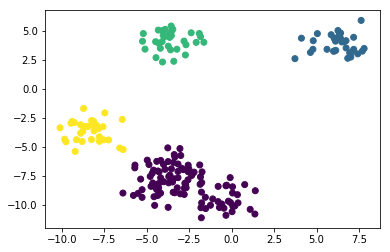

In [45]:
plt.scatter(points['x'],points['y'], c=points['labels'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

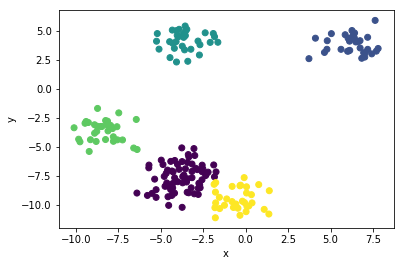

In [49]:
#Redo with 5 because it looks like 5 is also a good choice
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

points['labels'] = labels
plt.scatter(points['x'],points['y'], c=points['labels'])
plt.xlabel('x')
plt.ylabel('y')